<a href="https://colab.research.google.com/github/uswatnkh07/Demand-Forcasting-And-Safety-Stock-Management/blob/main/2209116010_Uswatun_Khasanah_Demand_Forcasting_And_Safety_Stock_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✨ Safety Stock Optimization to Provide Desired Service Level for Stochastic Demand ✨

### Inventory Policy:
Kebijakan persediaan adalah prosedur operasi standar untuk menerapkan model persediaan. Jelas bahwa model persediaan bergantung pada kebijakan persediaan yang dipilih. Dalam penerapan ini, digunakan kebijakan persediaan **(Q, R)**.

Di bawah kebijakan ini, tingkat persediaan dipantau secara terus menerus. Ketika tingkat persediaan turun di bawah ambang batas yang telah ditentukan sebelumnya (R), yang dikenal sebagai **Titik Pemesanan Kembali (ROP)**, pesanan pengisian ulang dengan jumlah tetap (Q), yang dikenal sebagai **Kuantitas Pemesanan Ekonomis (EOQ)**, dilakukan. Dalam masalah optimasi persediaan ini, terdapat dua variabel keputusan, yaitu Q dan R. Berikut gambar penjelasannya:

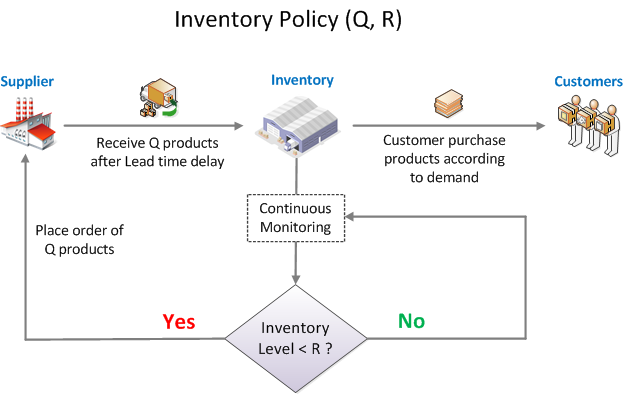

Optimasi persediaan memerlukan jawaban atas dua pertanyaan:

1. Kapan harus membeli (R)?

2. Berapa banyak yang harus dibeli (Q)?

- **Economic Order Quantity (EOQ):**
Jumlah pesanan yang sebaiknya dibeli perusahaan untuk persediaannya guna meminimalkan total biaya persediaan, seperti biaya penyimpanan dan biaya pemesanan.

- **Reorder Point (ROP):**
Tingkat persediaan di mana pesanan baru harus dilakukan.

- **Lead Time:**
Jangka waktu antara pemesanan dan penerimaan produk yang dipesan.

Jika permintaan bersifat **deterministik** sempurna, maka ROP dapat dihitung dengan mudah.
<h3><center>ROP = Demand during Lead time</center></h3

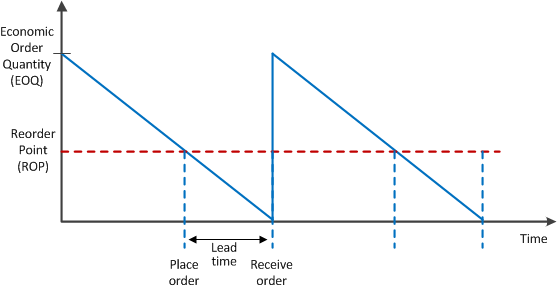


Jika permintaan bersifat **stokastik**, maka perhitungan ROP menjadi lebih kompleks. Jika permintaan selama lead time kurang dari yang diharapkan, akan ada persediaan saat pesanan diterima. Namun, jika permintaan selama lead time lebih dari yang diharapkan, akan terjadi kekurangan persediaan sebelum pesanan diterima dan layanan akan terganggu.

Selain itu, jika lead time juga menjadi stokastik, situasinya akan menjadi lebih buruk.

<h3><center>ROP = Mean demand during Lead time</center></h3

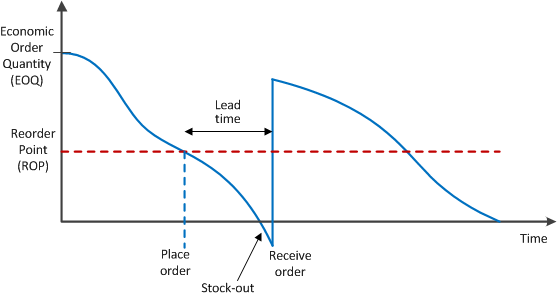

Untuk mencegah kekurangan persediaan, kita menyimpan tambahan stok yang dikenal sebagai **'stok pengaman (SS)'** guna meningkatkan ROP.

ROP is then calculated as:
<h3><center>ROP = Mean demand during Lead time + SS</center></h3



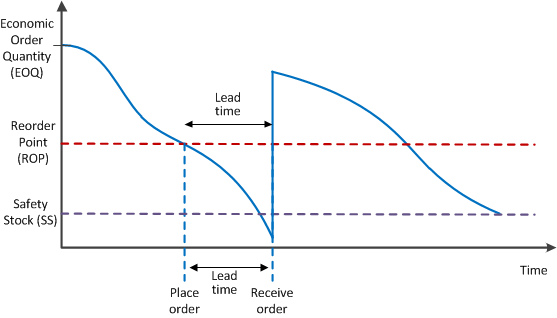



The calculation of safety stock (SS) depends on service level. Service level is a metric to quantify the level of stockouts that can be tolerated in order to meet the desired level of customer satisfaction.

If  $\,\alpha = P\,(\text{stockout})$, then the service level is defined as:

$$\text{Service level} = (1-\alpha) = \dfrac{\text{Quantity of products delivered}}{\text{Total quantity demanded}}$$

Selain tingkat layanan, jumlah **Safety stock (SS)** juga bergantung pada:

1. Permintaan harian acak yang dilambangkan dengan variabel acak $D_i$, dimana $i$ menunjukkan hari.

2. Lead time acak yang dilambangkan dengan variabel acak $L$.

**Assumptions:**

1. Permintaan harian $D_i$ adalah variabel normal yang identik dan terdistribusi independen (i.i.d) dengan $D_i\sim\mathcal{N}(\mu_D, \sigma_D^2)$

2. Lead time $L$ adalah variabel normal dengan $L\sim\mathcal{N}(\mu_L, \sigma_L^2)$

3. Permintaan harian pribadi dari lead time.

where,
 - $\mu_D$ = Nilai rata-rata permintaan harian

 - $\sigma_D^2$ = Varian permintaan harian

 - $\mu_L$ =  Nilai rata-rata lead time

 - $\sigma_L^2$ = Varian lead time

<h2><center>Demand Forcasting</center></h2>

In [ ]:
import warnings
import itertools
from math import *
import numpy as np
import pandas as pd
from scipy.stats import *
import statsmodels.api as sm
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn-colorblind')
from datetime import datetime

In [ ]:
demand_df = pd.read_excel('demand_data.xlsx')
demand_df['Date'] = pd.to_datetime(demand_df['Date'], format='%Y%m%d')
demand_df.set_index('Date', inplace=True)

In [ ]:
demand_df.head(3)

Daily_Demand
Date                    
2014-01-01             7
2014-01-02             9
2014-01-03             9

In [ ]:
# Resample the demand data in monthly interval
demand_ts = demand_df['Daily_Demand'].resample('MS').mean()
demand_ts.head(10)

Date
2014-01-01    6.741935
2014-02-01    6.642857
2014-03-01    7.419355
2014-04-01    6.500000
2014-05-01    7.096774
2014-06-01    6.066667
2014-07-01    6.774194
2014-08-01    6.580645
2014-09-01    7.166667
2014-10-01    7.032258
Freq: MS, Name: Daily_Demand, dtype: float64

<h3><center>Three Components of a Time Series</center></h3>

 - **Trend:**
Peningkatan atau penurunan jangka panjang dalam data yang mungkin tidak linier. Kadang-kadang tren bisa berubah seiring waktu.


 - **Seasonality:**
Kadang-kadang sebuah deret waktu menunjukkan fluktuasi teratur berdasarkan musim (misalnya, setiap minggu/bulan/tahun). Musiman selalu memiliki periode yang tetap dan diketahui.


 - **Noise/ Residual:**
Variasi acak dalam deret waktu setelah menghilangkan komponen tren dan musiman.

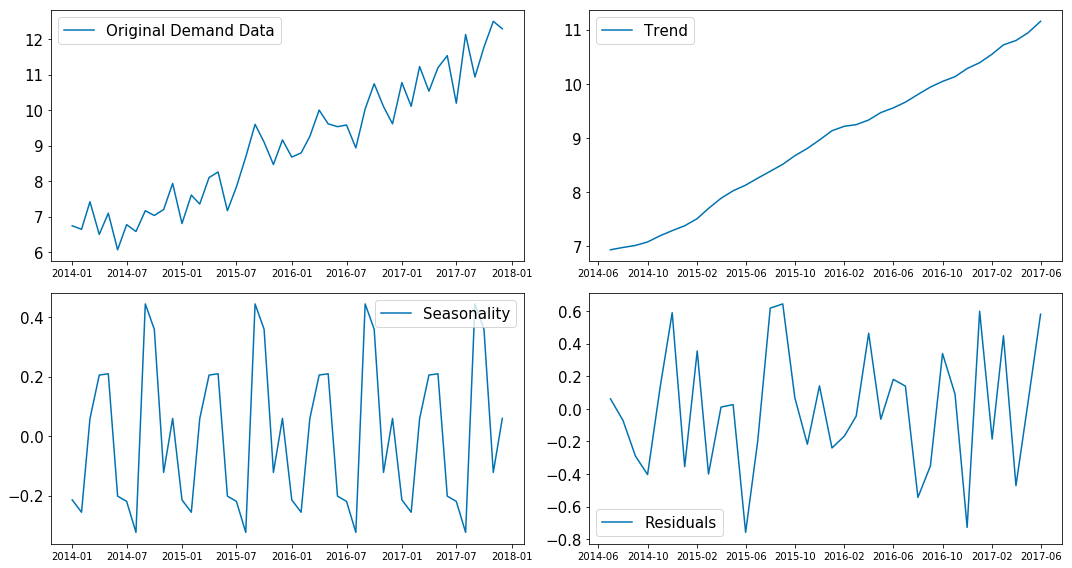

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(demand_ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15, 8))

plt.subplot(2,2,1)
plt.plot(demand_ts, label='Original Demand Data')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tight_layout()

Dataset untuk permintaan diberikan dari Januari 2014 hingga Desember 2017. Kami perlu memprediksi permintaan untuk seluruh tahun 2018, yaitu dari Januari 2018 hingga Desember 2018. Pertama, kami memprediksi permintaan untuk tahun 2017 dan membandingkan nilai prediksi dengan nilai aktual untuk mendapatkan perkiraan akurasi model. Kemudian kami memprediksi untuk tahun 2018.

<h2><center>ARIMA Time Series Model</center></h2>

Salah satu metode yang paling umum digunakan dalam peramalan deret waktu dikenal sebagai model ARIMA, yang merupakan singkatan dari Autoregressive Integrated Moving Average. Model ARIMA ini ditandai dengan notasi **ARIMA$(p, d, q)$** di mana tiga bilangan bulat berbeda $(p, d, q)$ digunakan untuk memparametrikkan model ARIMA.


- $p$ adalah parameter **auto-regresif**. Ini memungkinkan kita untuk memasukkan efek dari nilai-nilai masa lalu ke dalam model kita.

- $d$ adalah bagian **terintegrasi**. Ini memungkinkan kita untuk memasukkan jumlah differencing ke dalam deret waktu.

- $q$ adalah parameter **rata-rata bergerak**. Ini memungkinkan kita untuk menetapkan kesalahan model kita sebagai kombinasi linear dari nilai-nilai kesalahan yang diamati pada titik waktu sebelumnya di masa lalu.

Ketika menangani efek musiman, kita menggunakan ARIMA musiman, yang ditandai sebagai ARIMA $(p,d,q) (P,D,Q)_m$. Di sini, $(p, d, q)$ adalah parameter non-musiman seperti yang dijelaskan di atas, sedangkan $(P, D, Q)$ mengikuti definisi yang sama tetapi diterapkan pada komponen musiman dari deret waktu. Istilah $m$ adalah periodisitas dari deret waktu.

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
m = 12
seasonal_pdq = [(x[0], x[1], x[2], m) for x in list(itertools.product(p, d, q))]

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(demand_ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{};  AIC:{:.4f}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12);  AIC:343.9830
ARIMA(0, 0, 0)x(0, 0, 1, 12);  AIC:1503.0338
ARIMA(0, 0, 0)x(0, 1, 0, 12);  AIC:136.4478
ARIMA(0, 0, 0)x(1, 0, 0, 12);  AIC:88.5373
ARIMA(0, 0, 0)x(1, 0, 1, 12);  AIC:82.3173
ARIMA(0, 0, 0)x(1, 1, 0, 12);  AIC:80.6137
ARIMA(0, 0, 1)x(0, 0, 0, 12);  AIC:281.8774
ARIMA(0, 0, 1)x(0, 0, 1, 12);  AIC:1466.1437
ARIMA(0, 0, 1)x(0, 1, 0, 12);  AIC:118.6806
ARIMA(0, 0, 1)x(1, 0, 0, 12);  AIC:90.4716
ARIMA(0, 0, 1)x(1, 0, 1, 12);  AIC:80.6125
ARIMA(0, 0, 1)x(1, 1, 0, 12);  AIC:81.4410
ARIMA(0, 1, 0)x(0, 0, 0, 12);  AIC:108.8672
ARIMA(0, 1, 0)x(0, 0, 1, 12);  AIC:1489.2840
ARIMA(0, 1, 0)x(0, 1, 0, 12);  AIC:101.4313
ARIMA(0, 1, 0)x(1, 0, 0, 12);  AIC:86.8741
ARIMA(0, 1, 0)x(1, 0, 1, 12);  AIC:1478.6884
ARIMA(0, 1, 0)x(1, 1, 0, 12);  AIC:74.7917
ARIMA(0, 1, 1)x(0, 0, 0, 12);  AIC:93.5137
ARIMA(0, 1, 1)x(0, 0, 1, 12);  AIC:1462.1012
ARIMA(0, 1, 1)x(0, 1, 0, 12);  AIC:82.5307
ARIMA(0, 1, 1)x(1, 0, 0, 12);  AIC:78.8707
ARIMA(0, 1, 1)x(1, 0, 1, 12);  AIC:145

In [ ]:
mod = sm.tsa.statespace.SARIMAX(demand_ts,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
#print(results.summary().tables[1])

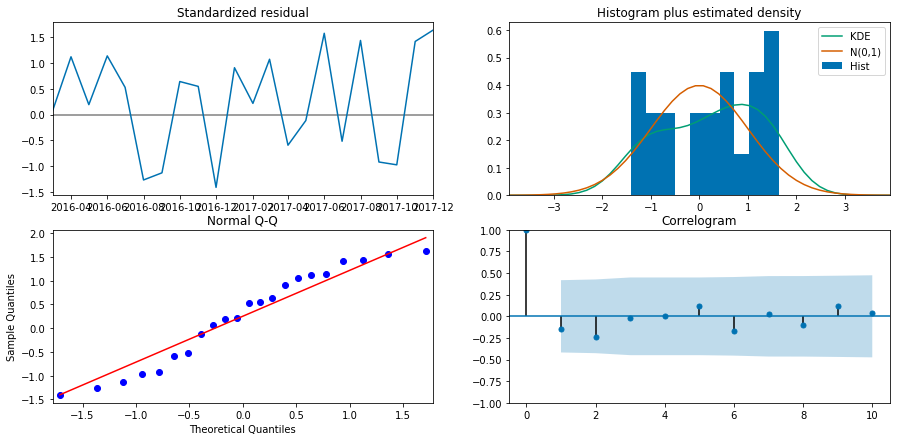

In [ ]:
results.plot_diagnostics(figsize=(15, 7))
plt.show()

In [ ]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head(10)

lower Daily_Demand  upper Daily_Demand
Date                                              
2017-01-01            8.772705           11.510949
2017-02-01            8.591613           11.321857
2017-03-01            9.121469           11.844983
2017-04-01            9.585161           12.302954
2017-05-01            9.917095           12.629984
2017-06-01            9.093726           11.802377
2017-07-01            9.197005           11.901971
2017-08-01            9.791129           12.492871
2017-09-01           10.215311           12.914221
2017-10-01           11.094367           13.790775

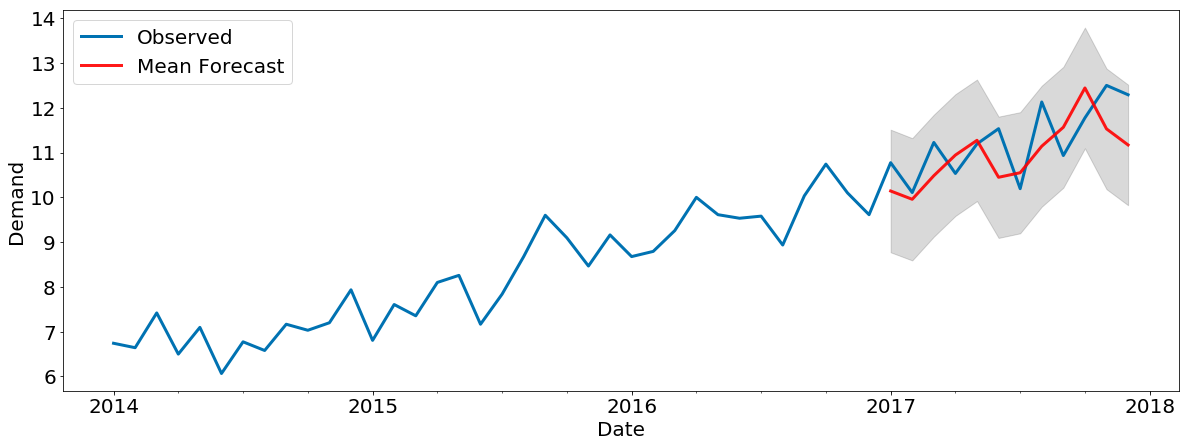

In [ ]:
ax = demand_ts['2014':].plot(label='Observed', linewidth = 3, figsize=(20, 7))
pred.predicted_mean.plot(ax=ax, label='Mean Forecast', linewidth = 3, alpha=0.9, color = 'r')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=0.15)

ax.set_xlabel('Date', fontsize = 20)
ax.set_ylabel('Demand', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('forecast1.png',  dpi = 300)
plt.show()

In [ ]:
# Get forecast 12 months ahead in future
forcast_uc = results.get_forecast(steps=12)

# Get confidence intervals of forecasts
forcast_ci = forcast_uc.conf_int()
forcast_ci.head(10)

lower Daily_Demand  upper Daily_Demand
2018-01-01           10.383229           13.073694
2018-02-01           10.354757           13.155559
2018-03-01           11.042514           13.873405
2018-04-01           11.049836           13.879833
2018-05-01           11.213304           14.046200
2018-06-01           11.364635           14.198302
2018-07-01           10.660285           13.495360
2018-08-01           11.409182           14.245433
2018-09-01           11.267220           14.104725
2018-10-01           12.046724           14.885455

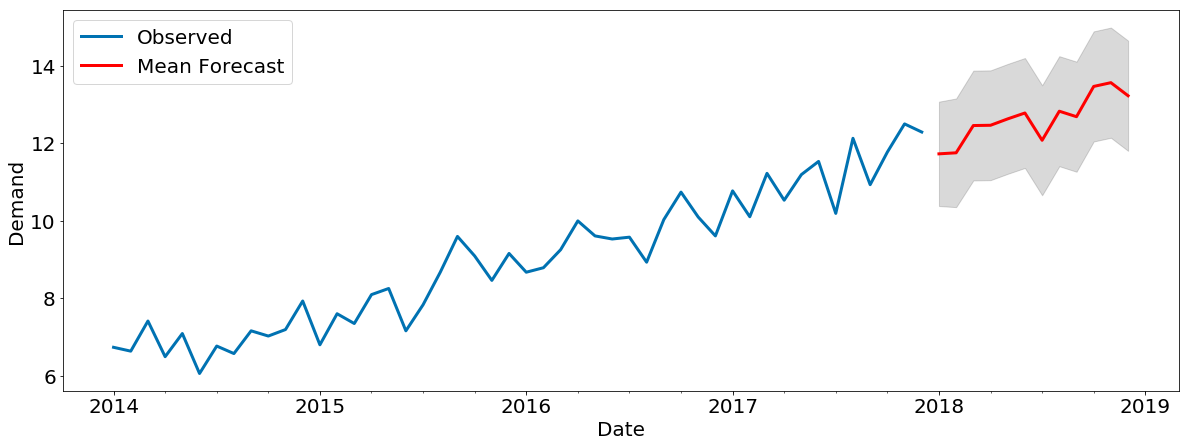

In [ ]:
ax = demand_ts.plot(label='Observed', linewidth = 3, figsize=(20, 7))
forcast_uc.predicted_mean.plot(ax=ax, label='Mean Forecast', linewidth = 3,color = 'r')
ax.fill_between(forcast_ci.index,
                forcast_ci.iloc[:, 0],
                forcast_ci.iloc[:, 1], color='k', alpha=.15)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Demand', fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc = 'upper left', fontsize=20)
plt.savefig('forecast2.png',  dpi = 300)
plt.show()

### Find the Mean and Standard Deviation of the forcast demand

Aturan jangkauan untuk Standar Deviasi:
$\,\,\,\sigma \approx \dfrac{max - min}{4}$

In [ ]:
demand_forcast = forcast_ci.copy()
demand_forcast['Mean_Daily_Demand'] = demand_forcast[['lower Daily_Demand', 'upper Daily_Demand']].mean(axis=1)
demand_forcast['Std_Daily_Demand'] = \
demand_forcast.apply(lambda x: (x['upper Daily_Demand'] - x['lower Daily_Demand'])/4, axis=1)
demand_forcast

lower Daily_Demand  upper Daily_Demand  Mean_Daily_Demand  \
2018-01-01           10.383229           13.073694          11.728461   
2018-02-01           10.354757           13.155559          11.755158   
2018-03-01           11.042514           13.873405          12.457959   
2018-04-01           11.049836           13.879833          12.464835   
2018-05-01           11.213304           14.046200          12.629752   
2018-06-01           11.364635           14.198302          12.781469   
2018-07-01           10.660285           13.495360          12.077822   
2018-08-01           11.409182           14.245433          12.827308   
2018-09-01           11.267220           14.104725          12.685973   
2018-10-01           12.046724           14.885455          13.466089   
2018-11-01           12.143010           14.982976          13.562993   
2018-12-01           11.805169           14.646366          13.225768   

            Std_Daily_Demand  
2018-01-01          0.672616  
2018-02-01          0.700201  
2018-03-01          0.707723  
2018-04-01          0.707499  
2018-05-01          0.708224  
2018-06-01          0.708417  
2018-07-01          0.708769  
2018-08-01          0.709063  
2018-09-01          0.709376  
2018-10-01          0.709683  
2018-11-01          0.709992  
2018-12-01          0.710299

<h2><center>Safety Stock Optimization</center></h2>

In [ ]:
# Lead time data from file
leadtime_df = pd.read_csv("lead_time.csv")
leadtime_list = leadtime_df["lead_time"].tolist()
leadtime_list[:20]

[1, 3, 3, 1, 1, 3, 3, 1, 4, 3, 1, 3, 4, 4, 4, 4, 4, 1, 5, 3]

Perhitungan rata-rata dan standar deviasi dari lead time: ($\mu_L$ and $\sigma_L$) :

In [ ]:
from statistics import mean, stdev

mu_L = mean(leadtime_list)
sigma_L = stdev(leadtime_list)

print('Mean of lead time = {:.3f}'.format(mu_L))
print('Standard Deviation of lead time = {:.3f}'.format(sigma_L))

Mean of lead time = 3.019
Standard Deviation of lead time = 1.306


Rata-rata dan standar deviasi permintaan: ($\mu_D$ and $\sigma_D$) :

In [ ]:
mu_D = demand_forcast['Mean_Daily_Demand'].tolist()
sigma_D = demand_forcast['Std_Daily_Demand'].tolist()

## Statistics of lead-time demand:
Permintaan lead time $D_L$, yang merupakan variabel acak baru diberikan oleh
$$D_L = \sum_{i=1}^{L}D_i$$
akan mengikuti distribusi normal dengan rata-rata dan varians yang diberikan oleh

$$\mathbb{E}[D_L] = \mathbb{E}\left[\sum_{i=1}^{L}D_i\right] = \mu_L\mu_D, \,\,\,\,Var[D_L] = \mathbb{E}\left[\sum_{i=1}^{L}D_i\right] = \mu_L\sigma_D^2+\mu_D^2\sigma_L^2$$

yaitu:

$$D_L\sim\mathcal{N}(\mu_L\mu_D,\, \mu_L\sigma_D^2+\mu_D^2\sigma_L^2)$$

Economic Order Quantity (EOQ):
----
EOQ dihitung menggunakan rumus berikut:

$$EOQ = \sqrt{\left(\frac{2\mu_Lc_0}{c_h}\right)}$$

dimana,

$\mu_D = $ Nilai rata-rata permintaan harian,

$c_0 = $ Biaya pemesanan tetap per pesanan,

$c_h = $ Biaya penyimpanan per satuan kuantitas per unit waktu

2018-Jan: EOQ = 53
2018-Feb: EOQ = 53
2018-Mar: EOQ = 55
2018-Apr: EOQ = 55
2018-May: EOQ = 55
2018-Jun: EOQ = 55
2018-Jul: EOQ = 54
2018-Aug: EOQ = 55
2018-Sep: EOQ = 55
2018-Oct: EOQ = 57
2018-Nov: EOQ = 57
2018-Dec: EOQ = 56


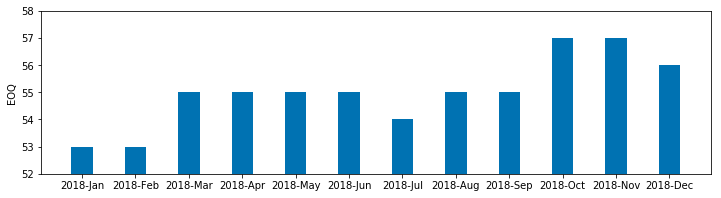

In [ ]:
c0 = 12000 # Fixed ordering cost per order
ch = 100 # Holding cost per unit per unit time

EOQ = []
datelist = pd.date_range(demand_forcast.index[0], demand_forcast.index[-1], \
                         freq='MS').strftime("%Y-%b").tolist()
for i, mean_demand_i in enumerate(mu_D):
    #D_L = mean_demand_i*mu_L
    EOQ.append(round(sqrt(2*mean_demand_i*c0/ch)))
    print("{}: EOQ = {}".format(datelist[i], EOQ[-1]))

plt.figure(figsize=(12, 3))
plt.bar(np.arange(len(datelist)), EOQ, width = 0.4)
plt.xticks(np.arange(len(datelist)), datelist)
plt.ylim(52, 58)
plt.ylabel('EOQ')
plt.savefig('EOQ.png',  dpi = 300)

## Calculation of Reorder point (ROP) and Safety Stock (SS) for $\,P(\text{No stock-out}) = 1 - \alpha$
Untuk $ (1-\alpha) $ tingkat layanan, rumus untuk **safey stock (SS)** diberikan oleh:

$$SS = z_{\alpha}\,Var[D_L] = z_{\alpha}\sqrt{\mu_L\sigma_D^2+\mu_D^2\sigma_L^2}$$

dimana $z_{\alpha}$ dihitung dengan hubungan:

$$Prob\,(z\geq z_{\alpha})=\alpha\,\,\, \text{ where }z\sim\mathcal{N}(0,1)$$<br>

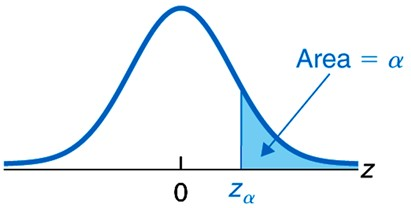

Setelah stok safety stock (SS) dihitung, **reorder point (ROP)** kemudian diberikan oleh:<br>

$$ROP = \mathbb{E}[D_L]+SS$$

$$=\mu_L\mu_D+z_{\alpha}\sqrt{\mu_L\sigma_D^2+\mu_D^2\sigma_L^2}$$

In [ ]:
alpha_list = np.linspace(0.90, 0.99, 10)
print(alpha_list)

[0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99]


In [ ]:
SS = [[]]*len(datelist)
ROP = [[]]*len(datelist)
for i, (mean_demand_i, std_demand_i) in enumerate(zip(mu_D, sigma_D)):
    SS_row_i = []
    ROP_row_i = []
    D_L = mean_demand_i*mu_L
    for alpha in alpha_list:
        z_value = norm.ppf(alpha)
        SS_value = z_value*sqrt(mu_L*(std_demand_i**2) + (mean_demand_i**2)*(sigma_L**2))
        SS_row_i.append(round(SS_value))

        # Reorder point (ROP) = Expected demand during lead time (D_L) + Safety stock (SS)
        ROP_row_i.append(round(D_L + SS_value))

    SS[i] = SS_row_i
    ROP[i] = ROP_row_i

In [ ]:
# Safety stock (SS)
SS_df = pd.DataFrame(SS)
SS_df.columns = [r'$\alpha$ = {:.2f}'.format(x) for x in alpha_list]
SS_df.index = datelist
SS_df

$\alpha$ = 0.90  $\alpha$ = 0.91  $\alpha$ = 0.92  $\alpha$ = 0.93  \
2018-Jan             20.0             21.0             22.0             23.0   
2018-Feb             20.0             21.0             22.0             23.0   
2018-Mar             21.0             22.0             23.0             24.0   
2018-Apr             21.0             22.0             23.0             24.0   
2018-May             21.0             22.0             23.0             24.0   
2018-Jun             21.0             22.0             24.0             25.0   
2018-Jul             20.0             21.0             22.0             23.0   
2018-Aug             22.0             23.0             24.0             25.0   
2018-Sep             21.0             22.0             23.0             25.0   
2018-Oct             23.0             24.0             25.0             26.0   
2018-Nov             23.0             24.0             25.0             26.0   
2018-Dec             22.0             23.0             24.0             26.0   

          $\alpha$ = 0.94  $\alpha$ = 0.95  $\alpha$ = 0.96  $\alpha$ = 0.97  \
2018-Jan             24.0             25.0             27.0             29.0   
2018-Feb             24.0             25.0             27.0             29.0   
2018-Mar             25.0             27.0             29.0             31.0   
2018-Apr             25.0             27.0             29.0             31.0   
2018-May             26.0             27.0             29.0             31.0   
2018-Jun             26.0             28.0             29.0             31.0   
2018-Jul             25.0             26.0             28.0             30.0   
2018-Aug             26.0             28.0             29.0             32.0   
2018-Sep             26.0             27.0             29.0             31.0   
2018-Oct             27.0             29.0             31.0             33.0   
2018-Nov             28.0             29.0             31.0             33.0   
2018-Dec             27.0             28.0             30.0             33.0   

          $\alpha$ = 0.98  $\alpha$ = 0.99  
2018-Jan             32.0             36.0  
2018-Feb             32.0             36.0  
2018-Mar             34.0             38.0  
2018-Apr             34.0             38.0  
2018-May             34.0             38.0  
2018-Jun             34.0             39.0  
2018-Jul             32.0             37.0  
2018-Aug             34.0             39.0  
2018-Sep             34.0             39.0  
2018-Oct             36.0             41.0  
2018-Nov             36.0             41.0  
2018-Dec             36.0             40.0

In [ ]:
# Reorder Point (ROP)
ROP_df = pd.DataFrame(ROP)
ROP_df.columns = [r'$\alpha$ = {:.2f}'.format(x) for x in alpha_list]
ROP_df.index = datelist
ROP_df

$\alpha$ = 0.90  $\alpha$ = 0.91  $\alpha$ = 0.92  $\alpha$ = 0.93  \
2018-Jan             55.0             56.0             57.0             58.0   
2018-Feb             55.0             56.0             57.0             58.0   
2018-Mar             59.0             59.0             61.0             62.0   
2018-Apr             59.0             60.0             61.0             62.0   
2018-May             59.0             60.0             61.0             63.0   
2018-Jun             60.0             61.0             62.0             63.0   
2018-Jul             57.0             58.0             59.0             60.0   
2018-Aug             60.0             61.0             62.0             64.0   
2018-Sep             60.0             61.0             62.0             63.0   
2018-Oct             63.0             64.0             65.0             67.0   
2018-Nov             64.0             65.0             66.0             67.0   
2018-Dec             62.0             63.0             64.0             65.0   

          $\alpha$ = 0.94  $\alpha$ = 0.95  $\alpha$ = 0.96  $\alpha$ = 0.97  \
2018-Jan             59.0             61.0             62.0             64.0   
2018-Feb             59.0             61.0             62.0             64.0   
2018-Mar             63.0             64.0             66.0             68.0   
2018-Apr             63.0             64.0             66.0             68.0   
2018-May             64.0             65.0             67.0             69.0   
2018-Jun             65.0             66.0             68.0             70.0   
2018-Jul             61.0             62.0             64.0             66.0   
2018-Aug             65.0             66.0             68.0             70.0   
2018-Sep             64.0             66.0             67.0             70.0   
2018-Oct             68.0             70.0             72.0             74.0   
2018-Nov             69.0             70.0             72.0             74.0   
2018-Dec             67.0             68.0             70.0             72.0   

          $\alpha$ = 0.98  $\alpha$ = 0.99  
2018-Jan             67.0             71.0  
2018-Feb             67.0             71.0  
2018-Mar             71.0             76.0  
2018-Apr             71.0             76.0  
2018-May             72.0             77.0  
2018-Jun             73.0             78.0  
2018-Jul             69.0             73.0  
2018-Aug             73.0             78.0  
2018-Sep             72.0             77.0  
2018-Oct             77.0             82.0  
2018-Nov             77.0             82.0  
2018-Dec             75.0             80.0

### Plotting SS and ROP in a chart

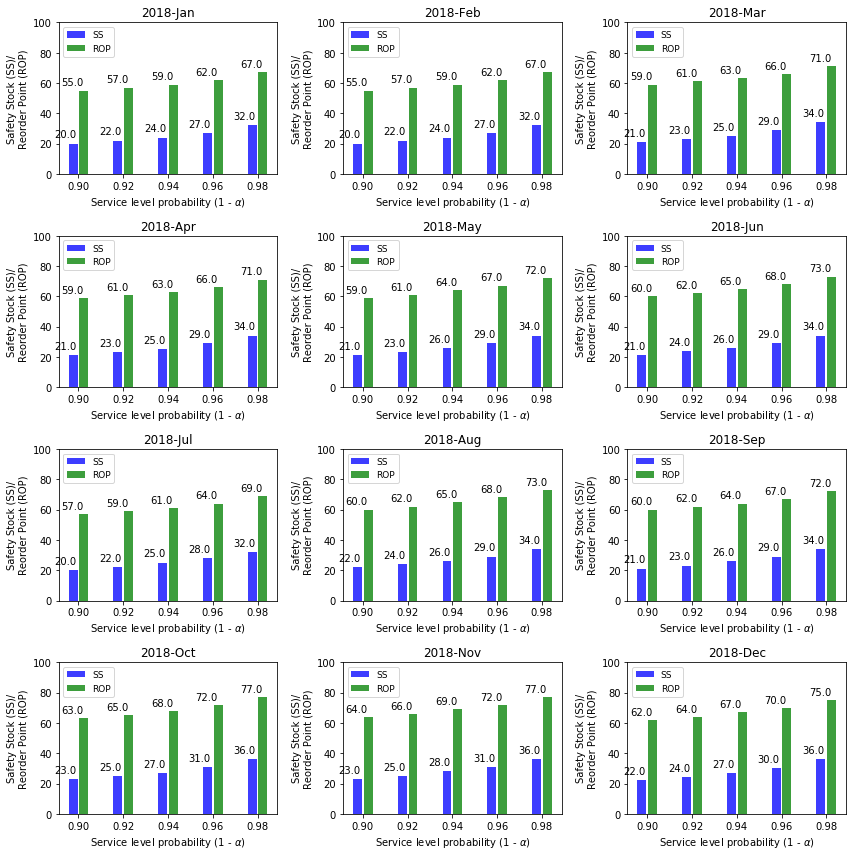

In [ ]:
fig1 = plt.figure(figsize=(12, 12))

skip = 2
for i in range(len(datelist)):

    SS_monthly_list = SS_df.iloc[i,:].tolist()
    ROP_monthly_list = ROP_df.iloc[i,:].tolist()

    ax = plt.subplot(4,3,i+1)

    ax.bar(alpha_list[::skip]-0.0012*skip, SS_monthly_list[::skip], width=0.002*skip, color='b',\
           align='center', label = 'SS', alpha = 0.76)
    ax.bar(alpha_list[::skip]+0.0012*skip, ROP_monthly_list[::skip], width=0.002*skip, color='g',\
           align='center',label = 'ROP', alpha = 0.76)

    for x, y, z in zip(alpha_list[::skip], SS_monthly_list[::skip], ROP_monthly_list[::skip]):
        plt.annotate(y, xy=(x, y), xytext=(-2, 4),\
            textcoords='offset points', ha='right', va='bottom')
        plt.annotate(z, xy=(x, z), xytext=(5, 3),\
            textcoords='offset points', ha='right', va='bottom')

    plt.xlabel('Service level probability (1 - $\\alpha$)', fontsize = 10)
    plt.ylabel('Safety Stock (SS)/'+'\n'+'Reorder Point (ROP)', fontsize = 10)
    plt.ylim(0, 100)
    plt.legend(loc = 'upper left', fontsize = 9)
    ax.set_title(datelist[i])

plt.tight_layout()
plt.show()